In [1]:
#Name UVIN ABEYSINGHE
#STUDENT ID 789931
#Answer to 1.1
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

#reading in the csv files 
jan = pd.read_csv('raw-january.csv',encoding = 'ISO-8859-1')
june = pd.read_csv('raw-june.csv',encoding = 'ISO-8859-1')

#converting columns of type string into DateTime
jan['dropoff_datetime']=pd.to_datetime(jan['dropoff_datetime'], format="%d/%m/%y %H:%M")
jan['pickup_datetime']=pd.to_datetime(jan['pickup_datetime'], format="%d/%m/%y %H:%M")
june['dropoff_datetime']=pd.to_datetime(june['dropoff_datetime'], format="%d/%m/%y %H:%M")
june['pickup_datetime']=pd.to_datetime(june['pickup_datetime'], format="%d/%m/%y %H:%M")

#creating column 'duration', calculating the duration and converting it to Minutes 
jan['duration']=(jan['dropoff_datetime'])-(jan['pickup_datetime'])
june['duration']=((june['dropoff_datetime'])-(june['pickup_datetime']))
jan['duration']=jan['duration'].dt.total_seconds()/60
june['duration']=june['duration'].dt.total_seconds()/60


#creating 2 new empty data frames and Concatenating with the required columns 
new_jan=pd.DataFrame()
new_june=pd.DataFrame()
new_jan=pd.concat([jan['duration'], jan['trip_distance'], jan['passenger_count'], jan['payment_amount']],axis=1,keys=['Duration','Trip Distance','Passenger Count','Payment Amount'])
new_june=pd.concat([june['duration'], june['trip_distance'], june['passenger_count'], june['payment_amount']],axis=1,keys=['Duration','Trip Distance','Passenger Count','Payment Amount'])
#setting the index column name
new_june.index.name='Index'
new_jan.index.name='Index'



In [2]:
#Answer to 1.2
#printing out in the required format
#.mean attribute calculates the mean of the column
print("**************************** MEAN TRIP DISTANCE ******************")
print("January:{0:3.3g}".format(new_jan['Trip Distance'].mean()))
print("   June:{0:3.3g}".format(new_june['Trip Distance'].mean()))
print("******************************************************************")
print("**************************** MEAN TRIP DURATION ******************")
print("January:{0:3.3g}".format(new_jan['Duration'].mean()))
print("   June:{:3.3g}".format(new_june['Duration'].mean()))
print("******************************************************************")
print("************************ MEAN TRIP PASSENGER COUNT ***************")
print("January:{0:3.3g}".format(new_jan['Passenger Count'].mean()))
print("   June:{0:3.3g}".format(new_june['Passenger Count'].mean()))
print("******************************************************************")







**************************** MEAN TRIP DISTANCE ******************
January:2.88
   June:3.05
******************************************************************
**************************** MEAN TRIP DURATION ******************
January: 15
   June: 17
******************************************************************
************************ MEAN TRIP PASSENGER COUNT ***************
January:1.67
   June:1.66
******************************************************************


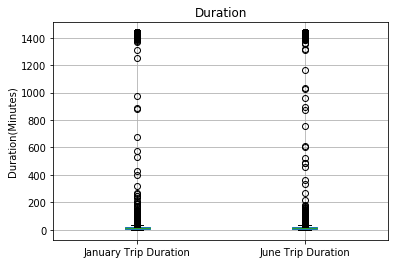

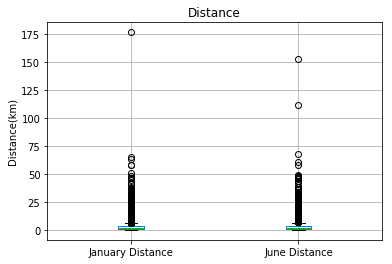

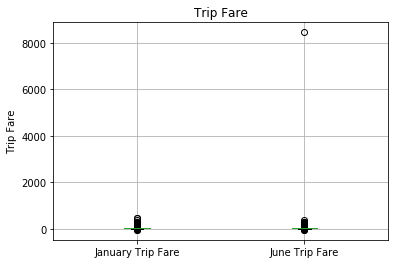

In [3]:
#Answer to 1.3


#creates a temporary data frame 
DF=pd.DataFrame()
#combines the empty data frame with the 2 columns using the keys given as column names
DF=pd.concat([new_jan['Duration'],new_june['Duration']], axis=1,keys=['January Trip Duration', 'June Trip Duration'])
#plot the box plot with y axix from 0 to 20
pd.DataFrame.boxplot(DF)
plt.ylabel('Duration(Minutes)')
plt.title('Duration')
plt.show()

#creates a temporary data frame 
DF=pd.DataFrame()
#combines the empty data frame with the 2 columns using the keys given as column names
DF=pd.concat([new_jan['Trip Distance'],new_june['Trip Distance']], axis=1,keys=['January Distance', 'June Distance'])
#plot the box plot with y axix from 0 to 20
pd.DataFrame.boxplot(DF)
plt.ylabel('Distance(km)')
plt.title('Distance')

plt.show()


#creates a temporary data frame 
DF=pd.DataFrame()
#combines the empty data frame with the 2 columns using the keys given as column names
DF=pd.concat([new_jan['Payment Amount'],new_june['Payment Amount']], axis=1,keys=['January Trip Fare', 'June Trip Fare'])
#plot the box plot with y axix from 0 to 20
pd.DataFrame.boxplot(DF)
plt.ylabel('Trip Fare')
plt.title('Trip Fare')


plt.show()



In [4]:
#Answer to 1.4
#Normal ranges

### Duration=[1 min,60mins]
#if the trip duration is zero it wont be a trip.
#people dont usually take Taxi trips if it takes more than 1 hour because it 
#will be very expensive,they'd rather use Train or Bus.

### Trip_Distance=[0.3,15]
#People wouldnt take a taxi if its only 300m because they can walk. Around 500m taxi could be for a sick or elderly person.
#more than 15 will be Ridiculously expensive and far so passengers will use 
#train or bus

### Passenger_count=[1,4]
#cannot be an empty taxi and 4 is the Maximum number of passeges in Taxi(car)

### Payment_amount=[5,100]
#There would be starting price of around 5, looks fitting after looking at the Payment_amount column 
#100 seems like the Maximum price passengers would pay for a taxi ride, train or bus would be cheaper.

#initializing

#getting the total number of rows 
total=len(jan.index);

#creating a new variable with the column duration, finding the number of values out of bound and dividing it by the toal number of values 
jan_trip_duration=jan['duration'];
jan_trip_duration_ratio=(((jan_trip_duration[jan_trip_duration>60].size) + (jan_trip_duration[jan_trip_duration<1].size) )/total)
#creating a new variable with the column duration, finding the number of values out of bound and dividing it by the toal number of values 
jan_trip_distance=jan['trip_distance'];
jan_trip_distance_ratio=(((jan_trip_distance[jan_trip_distance<0.3].size) + (jan_trip_distance[jan_trip_distance>15 ].size) )/total)
#creating a new variable with the column duration, finding the number of values out of bound and dividing it by the toal number of values 
jan_trip_passenger=jan['passenger_count'];
jan_trip_passenger_ratio=(((jan_trip_passenger[jan_trip_passenger<1].size) + (jan_trip_passenger[jan_trip_passenger>4 ].size) )/total)
#creating a new variable with the column duration, finding the number of values out of bound and dividing it by the toal number of values 
jan_trip_fare=jan['payment_amount'];
jan_trip_fare_ratio=(((jan_trip_fare[jan_trip_fare<5].size) + (jan_trip_fare[jan_trip_fare>100 ].size) )/total)





#printing out the ratio as a precentage
print("************************************************************************************")
print("{0:3.3g}% of instances in Duration are noisy! (normal range is between 001 and 060)".format((jan_trip_duration_ratio)*100,))
print("************************************************************************************")
print("{0:3.3g}% of instances in Trip Distance are noisy! (normal range is between 0.30 and 015)".format(jan_trip_distance_ratio*100))
print("************************************************************************************")
print("{0:3.3g}% of instances in Passenger Count are noisy! (normal range is between 001 and 004)".format(jan_trip_passenger_ratio*100))
print("************************************************************************************")
print("{0:3.3g}% of instances in Payment Amount are noisy! (normal range is between 005 and 100)".format(jan_trip_fare_ratio*100))
print("************************************************************************************")

#used help from http://stackoverflow.com/questions/21608228/conditional-replace-pandas/21608417

#changing the values which satisfy the Comparison into the mean values of the specific column
jan.ix[jan.duration < 1, 'duration'] = jan['duration'].mean()
jan.ix[jan.duration > 60, 'duration'] = jan['duration'].mean()
jan.ix[jan.trip_distance > 15, 'trip_distance'] = jan['trip_distance'].mean()
jan.ix[jan.trip_distance < 0.3, 'trip_distance'] = jan['trip_distance'].mean()
jan.ix[jan.passenger_count <1, 'passenger_count'] = jan['passenger_count'].mean()
jan.ix[jan.passenger_count > 4, 'passenger_count'] = jan['passenger_count'].mean()
jan.ix[jan.payment_amount > 100, 'payment_amount'] = jan['payment_amount'].mean()
jan.ix[jan.payment_amount < 5, 'payment_amount'] = jan['payment_amount'].mean()






************************************************************************************
1.2% of instances in Duration are noisy! (normal range is between 001 and 060)
************************************************************************************
4.02% of instances in Trip Distance are noisy! (normal range is between 0.30 and 015)
************************************************************************************
8.84% of instances in Passenger Count are noisy! (normal range is between 001 and 004)
************************************************************************************
2.31% of instances in Payment Amount are noisy! (normal range is between 005 and 100)
************************************************************************************


In [5]:
#Answer to 2.1
import datetime
#reading in the CSV file
clean_jan = pd.read_csv('clean-january.csv',encoding = 'ISO-8859-1')
#creating a Temporary column with the pickup date and time and creating a new column with the day of the week as a number
temp = pd.to_datetime(clean_jan['pickup_datetime'],format="%d/%m/%y %H:%M")
clean_jan['isWeekday'] = temp.dt.weekday
#creating a column indicating if its a weekend or weekday using the column which specifies which day of the week it is.
clean_jan.ix[clean_jan.isWeekday < 5, 'isWeekday'] = 0
clean_jan.ix[clean_jan.isWeekday >4, 'isWeekday'] = 1
#calculating the total number of rows in the dataframe
clean_total=len(clean_jan.index);
temp_weekend=clean_jan['isWeekday']
#calculating the number of weekdays in the dataframe 
weekend_freq=temp_weekend[temp_weekend==1].size


#printing
print("******************************************************************")
print("% of weekend trips= {0:3.3g}".format(100*weekend_freq/clean_total))
print("******************************************************************")



******************************************************************
% of weekend trips= 29.1
******************************************************************


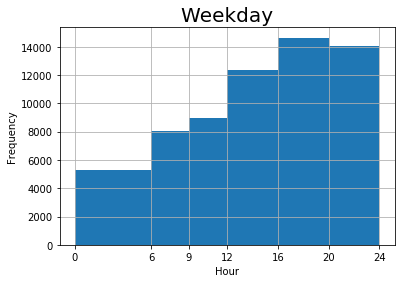

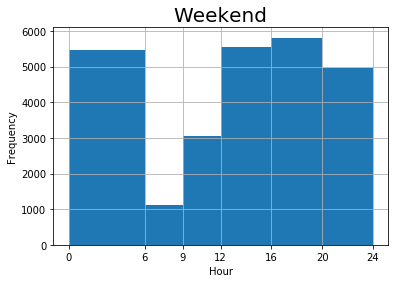

In [6]:
#Answer to 2.2
#separating the hour value from the datetime type
clean_jan['hours']=pd.DatetimeIndex(clean_jan['pickup_datetime']).hour
#Creating a series of just the weekday values
weekday_trip_hours=clean_jan['hours'][clean_jan['isWeekday']==0]
#drawing the histogram with correct bins and labelling
a=pd.DataFrame(weekday_trip_hours).hist(bins=[0, 6,9,12,16,20,24])
plt.title('Weekday', fontsize=20)
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.xticks([0, 6,9,12,16,20,24])
plt.show(a)

#Creating a series of just the weekday values
weekend_trip_hours=clean_jan['hours'][clean_jan['isWeekday']==1]
#drawing the histogram with correct bins and labelling
a=pd.DataFrame(weekend_trip_hours).hist(bins=[0, 6,9,12,16,20,24])
plt.title('Weekend', fontsize=20)
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.xticks([0, 6,9,12,16,20,24])
plt.show(a)

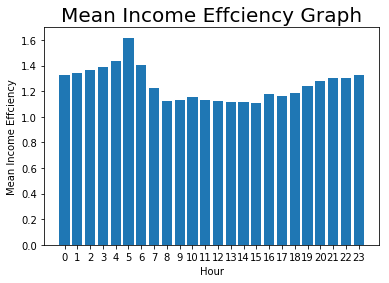

In [7]:
#Answer to 2.3
#creating a new column for efficiency and calcualting the values
clean_jan['income_effciency']=clean_jan['payment_amount']/clean_jan['duration']
temp=pd.DataFrame()
#grouping the according to the hours
separated_hours=clean_jan.groupby("hours")
mean_eff=[]
#calculating the mean effciency
for x, y in separated_hours:
    mean_eff.append(y['income_effciency'].mean())
#new column with all the hours possible and the mean effciencies
temp['hours']=range(0,24)
temp['mean_income_effciency']=mean_eff

#plotting the bar graph and labelling
plt.bar(temp['hours'],temp['mean_income_effciency'])
plt.title('Mean Income Effciency Graph', fontsize=20)
plt.xlabel('Hour')
plt.ylabel('Mean Income Effciency')
plt.xticks( temp['hours'])

plt.show()